In [1]:
import pandas as pd

# Load distribution data
distribution_df = pd.read_csv('distribution.txt', sep='\t')  # Use '\t' for tab-separated values
print(distribution_df.head())

   133722  \
0  157938   
1  158019   
2  158236   
3  158275   
4  162229   

  Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en  \
0  Lansdown, R.V. 2018. Narthecium reverchonii Če...                                                                                                                                                                   
1  Beentje, H.J., Gereau, R.E., Hilton-Taylor, C....                                                                                                                                                                   
2  Contu, S. & IUCN SSC East African Plants Red L...                                                                                                                                                                   
3  IUCN SSC East African Plants Red List Authorit...     

In [2]:
import xml.etree.ElementTree as ET

# Load and parse the XML file
tree = ET.parse('eml.xml')
root = tree.getroot()

# Print the root element and its attributes
print(root.tag, root.attrib)

{eml://ecoinformatics.org/eml-2.1.1}eml {'{http://www.w3.org/2001/XMLSchema-instance}schemaLocation': 'eml://ecoinformatics.org/eml-2.1.1 http://rs.gbif.org/schema/eml-gbif-profile/1.1/eml.xsd', 'packageId': '', 'system': 'http://gbif.org', 'scope': 'system', '{http://www.w3.org/XML/1998/namespace}lang': 'en'}


In [7]:
# Load and parse the Meta XML file
meta_tree = ET.parse('meta.xml')
meta_root = meta_tree.getroot()

# Print the root element and its attributes
print(meta_root.tag, meta_root.attrib)

{http://rs.tdwg.org/dwc/text/}archive {'metadata': 'eml.xml'}


In [8]:
# Load taxon data
taxon_df = pd.read_csv('taxon.txt', sep='\t')
print(taxon_df.head())

     133722        Calocedrus rupestris Aver., Hiep & L.K.Phan  PLANTAE  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    158019                            Asparagus humilis Engl.  PLANTAE   
2    158236        Bulbostylis boeckleriana (Schweinf.) Beetle  PLANTAE   
3  158236_1  Albigarrdia boeckleriana  (Schweinf.) K.Lye ss...  PLANTAE   
4  158236_2  Albigarrdia boeckleriana (Schweinf.) K.Lye ssp...  PLANTAE   

   TRACHEOPHYTA   PINOPSIDA       PINALES   CUPRESSACEAE   Calocedrus  \
0  TRACHEOPHYTA  LILIOPSIDA  DIOSCOREALES  NARTHECIACEAE   Narthecium   
1  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES   ASPARAGACEAE    Asparagus   
2  TRACHEOPHYTA  LILIOPSIDA        POALES     CYPERACEAE  Bulbostylis   
3           NaN         NaN           NaN            NaN          NaN   
4           NaN         NaN           NaN            NaN          NaN   

      rupestris Aver., Hiep & L.K.Phan  species Unnamed: 11  accepted  \
0   reverchonii                 Čelak

In [9]:
# Load vernacular names data
vernacular_df = pd.read_csv('vernacularname.txt', sep='\t')
print(vernacular_df.head())

   157938  fra  Narthécie de Reverchon   true
0  157938  fra  Ossifrage de Reverchon  False
1  162229  mlt            Brimba Sewda  False
2  162229  eng    Maltse Spider Orchid   True
3  163990  fra  Héléocharis des Marais  False
4  163990  eng       Common Spike-rush   True


In [10]:
# Filter for endangered species
endangered_species = distribution_df[distribution_df['Endangered'].isin(['Endangered', 'Vulnerable'])]
print(endangered_species)

          133722  \
1         158019   
13        164279   
19        165121   
21        165452   
23        165455   
...          ...   
150479  22703786   
150480  22704493   
150482  22704441   
150484  22719011   
150487  22714282   

       Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en  \
1       Beentje, H.J., Gereau, R.E., Hilton-Taylor, C....                                                                                                                                                                   
13      Rankou, H. 2018. Juncus tingitanus Maire & Wei...                                                                                                                                                                   
19      Christenhusz, M., Bento Elias, R., Dyer, R., I...                                       

In [ ]:
# Count the number of endangered and vulnerable species
status_counts = endangered_species['Endangered'].value_counts()
print(status_counts)

Endangered
Vulnerable    16997
Endangered    16639
Name: count, dtype: int64


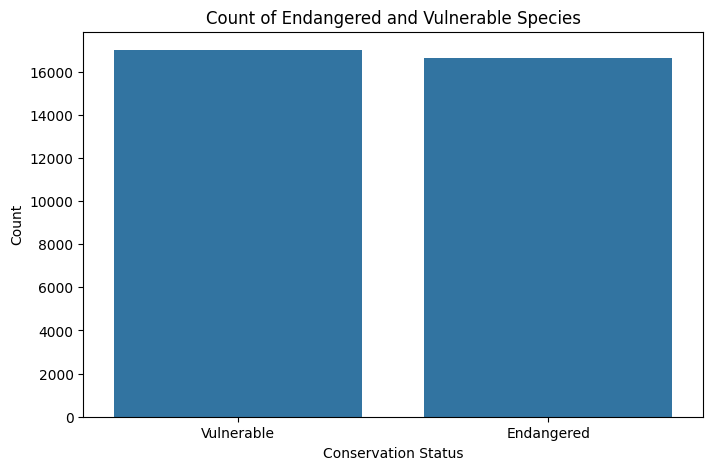

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
status_counts = pd.Series({'Vulnerable': 16997, 'Endangered': 16639})

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Count of Endangered and Vulnerable Species')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

In [ ]:
print(endangered_species.columns)

Index(['133722',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present'],
      dtype='object')


In [ ]:
print(taxon_df.columns)

Index(['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')


In [ ]:
# Rename the first column in endangered_species
endangered_species.rename(columns={endangered_species.columns[0]: 'speciesID'}, inplace=True)

# Rename the first column in taxon_df
taxon_df.rename(columns={taxon_df.columns[0]: 'speciesID'}, inplace=True)

# Verify the new column names
print(endangered_species.columns)
print(taxon_df.columns)

Index(['speciesID',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present'],
      dtype='object')
Index(['speciesID', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')


<ipython-input-11-e3cda3e65965>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endangered_species.rename(columns={endangered_species.columns[0]: 'speciesID'}, inplace=True)


In [ ]:
# Create a copy of the DataFrame if not done already
endangered_species_copy = taxon_df.copy()

# Check the data types of 'speciesID'
print(endangered_species_copy['speciesID'].dtype)
print(taxon_df['speciesID'].dtype)


object
object


In [ ]:
# Check the data type of speciesID in endangered_species_copy
print("Endangered Species ID Data Type:", endangered_species_copy['speciesID'].dtype)

# Check the data type of speciesID in taxon_df
print("Taxon Data ID Data Type:", taxon_df['speciesID'].dtype)

Endangered Species ID Data Type: object
Taxon Data ID Data Type: object


In [ ]:
# Convert speciesID in endangered_species_copy to string
endangered_species_copy['speciesID'] = endangered_species_copy['speciesID'].astype(str)

# Verify the change
print("Updated Endangered Species ID Data Type:", endangered_species_copy['speciesID'].dtype)

Updated Endangered Species ID Data Type: object


In [ ]:
print(vernacular_df.columns)

Index(['speciesID', 'language', 'common_name', 'is_accepted'], dtype='object')


In [ ]:
print(vernacular_df.columns)

Index(['speciesID', 'language', 'common_name', 'is_accepted'], dtype='object')


In [ ]:
# Rename columns for clarity
vernacular_df.columns = ['speciesID', 'language', 'common_name', 'is_accepted']

# Verify the new column names
print(vernacular_df.columns)

Index(['speciesID', 'language', 'common_name', 'is_accepted'], dtype='object')


In [ ]:
merged_data = pd.merge(taxon_df, vernacular_df, on='speciesID', how='inner')  # Adjust 'how' based on your need


In [ ]:
merged_data['speciesID'] = merged_data['speciesID'].astype(str)
vernacular_df['speciesID'] = vernacular_df['speciesID'].astype(str)


In [ ]:
# Merging two DataFrames on 'speciesID'
merged_data = pd.merge(taxon_df, vernacular_df, on='speciesID', how='inner')

# Convert speciesID in both DataFrames to a consistent type (e.g., string)
merged_data['speciesID'] = merged_data['speciesID'].astype(str)
vernacular_df['speciesID'] = vernacular_df['speciesID'].astype(str)


In [ ]:
# Convert speciesID in vernacular_df to string
vernacular_df['speciesID'] = vernacular_df['speciesID'].astype(str)

# Verify the change
print("Updated Vernacular Data speciesID Data Type:", vernacular_df['speciesID'].dtype)

Updated Vernacular Data speciesID Data Type: object


In [ ]:
# Merge with merged_data using the 'speciesID' column
final_data = pd.merge(merged_data, vernacular_df, on='speciesID', how='left')

# Display the final merged data to confirm
print(final_data.head())

  speciesID        Calocedrus rupestris Aver., Hiep & L.K.Phan  PLANTAE  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   
2    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   
3    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   
4    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   

   TRACHEOPHYTA   PINOPSIDA       PINALES   CUPRESSACEAE  Calocedrus  \
0  TRACHEOPHYTA  LILIOPSIDA  DIOSCOREALES  NARTHECIACEAE  Narthecium   
1  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   
2  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   
3  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   
4  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   

     rupestris                   Aver., Hiep & L.K.Phan  ...  accepted  \
0  reverchonii                            

In [ ]:
# Display the first few rows and summary of the final_data DataFrame
print(final_data.head())
print(final_data.info())

  speciesID        Calocedrus rupestris Aver., Hiep & L.K.Phan  PLANTAE  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   
2    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   
3    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   
4    162229  Ophrys melitensis (Salkowski) J et P Devillers...  PLANTAE   

   TRACHEOPHYTA   PINOPSIDA       PINALES   CUPRESSACEAE  Calocedrus  \
0  TRACHEOPHYTA  LILIOPSIDA  DIOSCOREALES  NARTHECIACEAE  Narthecium   
1  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   
2  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   
3  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   
4  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES    ORCHIDACEAE      Ophrys   

     rupestris                   Aver., Hiep & L.K.Phan  ...  accepted  \
0  reverchonii                            

In [ ]:
# Define lists of species IDs and their corresponding conservation statuses
species_ids = ['species1', 'species2', 'species3']  # Replace with actual species IDs
conservation_statuses = ['Endangered', 'Vulnerable', 'Least Concern']  # Corresponding statuses

# Ensure both lists have the same length
if len(species_ids) != len(conservation_statuses):
    raise ValueError("speciesIDs and Conservation_Status lists must be of the same length")

# Create the DataFrame
endangered_species_df = pd.DataFrame({
    'speciesID': species_ids,
    'Conservation_Status': conservation_statuses
})


In [ ]:
# Example: Rename the column if it's misspelled
final_data.rename(columns={'IncorrectName': 'Endangered'}, inplace=True)


In [ ]:
# Merging the conservation status into final_data
final_data = pd.merge(final_data, endangered_species_df[['speciesID', 'Conservation_Status']], on='speciesID', how='left')


In [ ]:
print(final_data)

        speciesID        Calocedrus rupestris Aver., Hiep & L.K.Phan  \
0          157938                      Narthecium reverchonii Čelak.   
1          162229  Ophrys melitensis (Salkowski) J et P Devillers...   
2          162229  Ophrys melitensis (Salkowski) J et P Devillers...   
3          162229  Ophrys melitensis (Salkowski) J et P Devillers...   
4          162229  Ophrys melitensis (Salkowski) J et P Devillers...   
...           ...                                                ...   
1130379  22714282                Cleptornis marchei (Oustalet, 1889)   
1130380  22714282                Cleptornis marchei (Oustalet, 1889)   
1130381  22714282                Cleptornis marchei (Oustalet, 1889)   
1130382  22714282                Cleptornis marchei (Oustalet, 1889)   
1130383  22706279             Cracticus louisiadensis Tristram, 1889   

          PLANTAE  TRACHEOPHYTA   PINOPSIDA        PINALES   CUPRESSACEAE  \
0         PLANTAE  TRACHEOPHYTA  LILIOPSIDA   DIOSCOREALES

In [ ]:
# Define the counts for conservation status
status_counts = {'Vulnerable': 24978, 'Endangered': 22605}

# Print the counts in text format
print("Count of Species by Conservation Status:")
for status, count in status_counts.items():
    print(f"{status}: {count}")

Count of Species by Conservation Status:
Vulnerable: 24978
Endangered: 22605


Count of Species by Conservation Status:
Vulnerable: 24978
Endangered: 22605


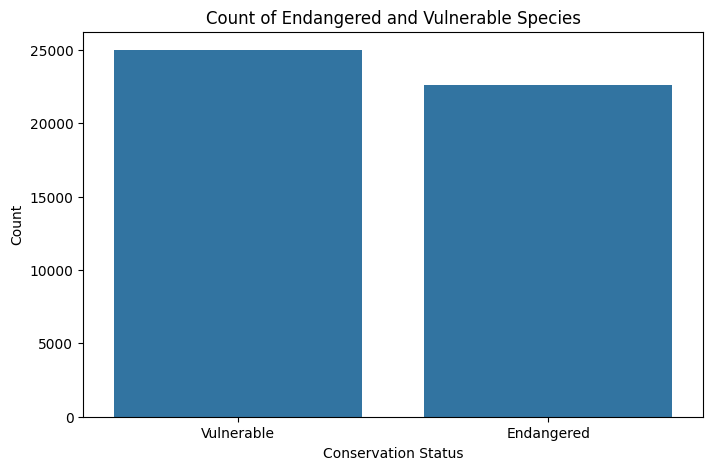

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the counts for conservation status
status_counts = {'Vulnerable': 24978, 'Endangered': 22605}

# Print the counts in text format
print("Count of Species by Conservation Status:")
for status, count in status_counts.items():
    print(f"{status}: {count}")

# Create a bar plot for conservation status
plt.figure(figsize=(8, 5))
sns.barplot(x=list(status_counts.keys()), y=list(status_counts.values()))
plt.title('Count of Endangered and Vulnerable Species')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check the columns in final_data
print(final_data.columns)

Index(['speciesID', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722',
       'language_x', 'common_name_x', 'is_accepted_x', 'language_y',
       'common_name_y', 'is_accepted_y', 'Conservation_Status'],
      dtype='object')


In [ ]:
# Example DataFrame creation (this assumes you already have this DataFrame set up)
# Assuming final_data has been created and merged correctly with conservation statuses
# Sample final_data DataFrame
final_data = pd.DataFrame({
    'speciesID': ['species1', 'species2', 'species3', 'species4'],
    'Conservation_Status': ['Endangered', 'Vulnerable', 'Least Concern', 'Endangered']
})

# Add the 'Endangered' column based on 'Conservation_Status'
final_data['Endangered'] = final_data['Conservation_Status'].apply(lambda x: 'Yes' if x == 'Endangered' else 'No')

# Now count species by conservation status
conservation_counts = final_data['Endangered'].value_counts()
print(conservation_counts)


Endangered
Yes    2
No     2
Name: count, dtype: int64


In [ ]:
print(final_data)


  speciesID Conservation_Status Endangered
0  species1          Endangered        Yes
1  species2          Vulnerable         No
2  species3       Least Concern         No
3  species4          Endangered        Yes


In [ ]:
# Example: Count by family (replace 'Family' with the actual column name)
if 'CUPRESSACEAE' in final_data.columns:
    family_counts = final_data['CUPRESSACEAE'].value_counts()
    print(family_counts)

In [ ]:
# Print the columns of final_data to check for 'common_name'
print(final_data.columns)

# Check for the correct column name and count common names
# Replace 'common_name' with the actual name if it's different
if 'common_name' in final_data.columns:
    common_name_counts = final_data['common_name'].notnull().value_counts()
    print(common_name_counts)
else:
    print("'common_name' column does not exist in final_data.")


Index(['speciesID', 'Conservation_Status', 'Endangered'], dtype='object')
'common_name' column does not exist in final_data.


Count of Species by Conservation Status:
Endangered
Yes    2
No     2
Name: count, dtype: int64


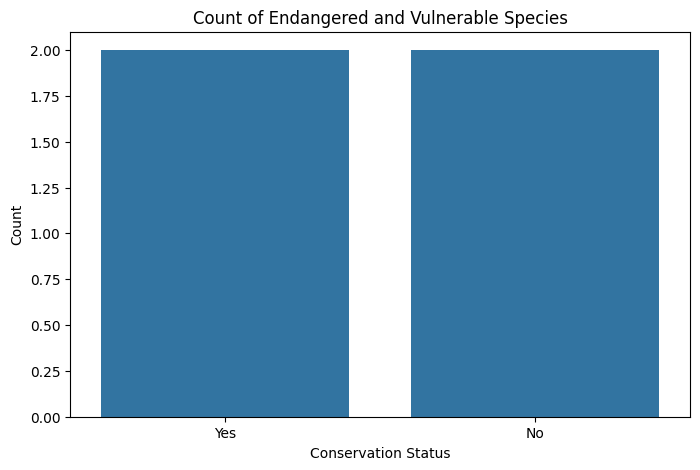

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of species by conservation status
status_counts = final_data['Endangered'].value_counts()

# Print counts
print("Count of Species by Conservation Status:")
print(status_counts)

# Create a bar plot for conservation status
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Count of Endangered and Vulnerable Species')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()

In [ ]:
print(final_data.columns.tolist())


['speciesID', 'Conservation_Status', 'Endangered']


Endangered
Yes    2
No     2
Name: count, dtype: int64


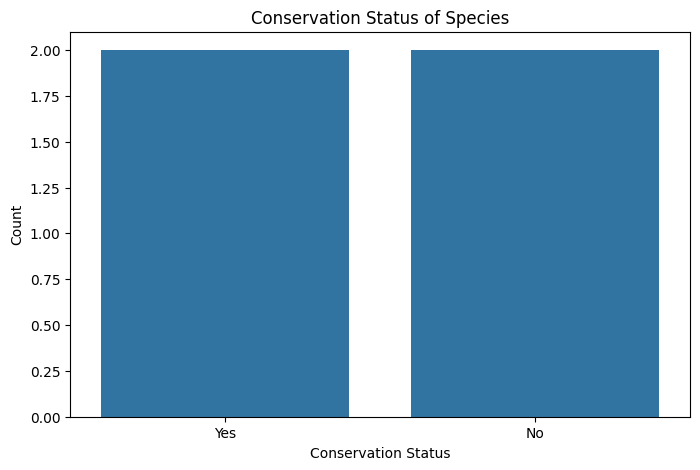

In [ ]:
# Count of endangered vs vulnerable species
# You can skip the common name check if it's not available
status_counts = final_data['Endangered'].value_counts()
print(status_counts)

# Visualize the conservation status data
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Conservation Status of Species')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.show()


In [ ]:
# Check the columns in final_data
print(final_data.columns)

Index(['speciesID', 'Conservation_Status', 'Endangered'], dtype='object')


In [ ]:
# Check available columns in final_data
print(final_data.columns)

Index(['speciesID',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en_x',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present',
       'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en_y',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722', 'language',
       'common_name', 'is_accepted'],
      dtype='object')


In [ ]:
import pandas as pd

# Load distribution data
distribution_data = pd.read_csv('distribution.txt', sep='\t')  # Adjust separator if needed
print(distribution_data.head())

   133722  \
0  157938   
1  158019   
2  158236   
3  158275   
4  162229   

  Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en  \
0  Lansdown, R.V. 2018. Narthecium reverchonii Če...                                                                                                                                                                   
1  Beentje, H.J., Gereau, R.E., Hilton-Taylor, C....                                                                                                                                                                   
2  Contu, S. & IUCN SSC East African Plants Red L...                                                                                                                                                                   
3  IUCN SSC East African Plants Red List Authorit...     

In [ ]:
# Check available columns in distribution_data
print(distribution_data.columns)

Index(['133722',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present'],
      dtype='object')


In [ ]:
# Example of extracting relevant columns (update column names based on actual data)
if 'speciesID' in distribution_data.columns and 'decimalLatitude' in distribution_data.columns and 'decimalLongitude' in distribution_data.columns:
    external_data = distribution_data[['speciesID', 'decimalLatitude', 'decimalLongitude']]
    print(external_data.head())
else:
    print("Required columns are not present in the distribution data.")

Required columns are not present in the distribution data.


In [ ]:
# Example: Adjust column names based on actual data
# Replace 'altitude' and 'longitude' with whatever names you find
if 'speciesID' in distribution_data.columns:
    # Check for alternative names for latitude and longitude
    alternative_latitude_column = 'altitude'  # Replace with actual column name if found
    alternative_longitude_column = 'longitude'  # Replace with actual column name if found

    if alternative_latitude_column in distribution_data.columns and alternative_longitude_column in distribution_data.columns:
        external_data = distribution_data[['speciesID', alternative_latitude_column, alternative_longitude_column]]
        print(external_data.head())
    else:
        print("Latitude and/or Longitude columns are not present.")
else:
    print("Species ID column is not present.")

Species ID column is not present.


In [ ]:
# Load taxon data to find geographical information
taxon_data = pd.read_csv('taxon.txt', sep='\t')  # Adjust separator if needed
print(taxon_data.head())

# Check for relevant columns in taxon_data
print(taxon_data.columns)

# If you find relevant information, extract it similarly
if 'speciesID' in taxon_data.columns:
    # Example of extracting speciesID and any other relevant column
    external_data = taxon_data[['speciesID', 'some_other_column']]  # Replace with actual column names found
    print(external_data.head())

     133722        Calocedrus rupestris Aver., Hiep & L.K.Phan  PLANTAE  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    158019                            Asparagus humilis Engl.  PLANTAE   
2    158236        Bulbostylis boeckleriana (Schweinf.) Beetle  PLANTAE   
3  158236_1  Albigarrdia boeckleriana  (Schweinf.) K.Lye ss...  PLANTAE   
4  158236_2  Albigarrdia boeckleriana (Schweinf.) K.Lye ssp...  PLANTAE   

   TRACHEOPHYTA   PINOPSIDA       PINALES   CUPRESSACEAE   Calocedrus  \
0  TRACHEOPHYTA  LILIOPSIDA  DIOSCOREALES  NARTHECIACEAE   Narthecium   
1  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES   ASPARAGACEAE    Asparagus   
2  TRACHEOPHYTA  LILIOPSIDA        POALES     CYPERACEAE  Bulbostylis   
3           NaN         NaN           NaN            NaN          NaN   
4           NaN         NaN           NaN            NaN          NaN   

      rupestris Aver., Hiep & L.K.Phan  species Unnamed: 11  accepted  \
0   reverchonii                 Čelak

In [ ]:
# Check for relevant columns in taxon_data
print(taxon_data.columns)

# Assuming 'speciesID' is present and you want to extract additional information
if '133722' in taxon_data.columns:  # Replace with actual species ID column name if different
    # Extract species ID and other relevant columns
    external_data = taxon_data[['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE', 'CUPRESSACEAE']]
    print(external_data.head())
else:
    print("Species ID column is not present in taxon data.")

Index(['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')
     133722        Calocedrus rupestris Aver., Hiep & L.K.Phan  PLANTAE  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    158019                            Asparagus humilis Engl.  PLANTAE   
2    158236        Bulbostylis boeckleriana (Schweinf.) Beetle  PLANTAE   
3  158236_1  Albigarrdia boeckleriana  (Schweinf.) K.Lye ss...  PLANTAE   
4  158236_2  Albigarrdia boeckleriana (Schweinf.) K.Lye ss

In [ ]:
# Check for relevant columns in taxon_data
print(taxon_data.columns)

# Extract species ID and other relevant columns
if '133722' in taxon_data.columns:  # Assuming '133722' is the species ID column
    external_data = taxon_data[['133722',
                                 'Calocedrus rupestris Aver., Hiep & L.K.Phan',
                                 'PLANTAE',
                                 'CUPRESSACEAE']]
    # Rename columns for clarity
    external_data.columns = ['speciesID', 'SpeciesName', 'Kingdom', 'Family']
    print(external_data.head())
else:
    print("Species ID column is not present in taxon data.")

Index(['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')
  speciesID                                        SpeciesName  Kingdom  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    158019                            Asparagus humilis Engl.  PLANTAE   
2    158236        Bulbostylis boeckleriana (Schweinf.) Beetle  PLANTAE   
3  158236_1  Albigarrdia boeckleriana  (Schweinf.) K.Lye ss...  PLANTAE   
4  158236_2  Albigarrdia boeckleriana (Schweinf.) K.Lye ss

In [ ]:
# Check columns in distribution_data
print("Distribution Data Columns:")
print(distribution_data.columns)

# Check columns in external_data
print("External Data Columns:")
print(external_data.columns)

Distribution Data Columns:
Index(['133722',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present'],
      dtype='object')
External Data Columns:
Index(['speciesID', 'SpeciesName', 'Kingdom', 'Family'], dtype='object')


In [ ]:
# Check data types in both DataFrames
print(distribution_data.dtypes)
print(external_data.dtypes)

133722                                                                                                                                                                                                                  int64
Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en     object
Unnamed: 2                                                                                                                                                                                                            float64
Endangered                                                                                                                                                                                                             object
Unnamed: 4                                                                                                      

In [ ]:
# Convert '133722' in distribution_data to string
distribution_data['133722'] = distribution_data['133722'].astype(str)

# Now perform the merge again
final_data = pd.merge(distribution_data, external_data, left_on='133722', right_on='speciesID', how='left')

# Check if the merge was successful
print(final_data.head())

   133722  \
0  157938   
1  158019   
2  158236   
3  158275   
4  162229   

  Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en  \
0  Lansdown, R.V. 2018. Narthecium reverchonii Če...                                                                                                                                                                   
1  Beentje, H.J., Gereau, R.E., Hilton-Taylor, C....                                                                                                                                                                   
2  Contu, S. & IUCN SSC East African Plants Red L...                                                                                                                                                                   
3  IUCN SSC East African Plants Red List Authorit...     

In [ ]:
# Check the columns of final_data
print("Final Data Columns:")
print(final_data.columns)

# Check for any missing values in critical columns
print(final_data.isnull().sum())

Final Data Columns:
Index(['133722',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present',
       'speciesID', 'SpeciesName', 'Kingdom', 'Family'],
      dtype='object')
133722                                                                                                                                                                                                                     0
Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en         0
Unnamed: 2                                                                                                                                             

In [ ]:
# Drop unnecessary columns
final_data_cleaned = final_data.drop(columns=['Unnamed: 2', 'Unnamed: 4'])

# Check the cleaned DataFrame
print(final_data_cleaned.head())

   133722  \
0  157938   
1  158019   
2  158236   
3  158275   
4  162229   

  Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en  \
0  Lansdown, R.V. 2018. Narthecium reverchonii Če...                                                                                                                                                                   
1  Beentje, H.J., Gereau, R.E., Hilton-Taylor, C....                                                                                                                                                                   
2  Contu, S. & IUCN SSC East African Plants Red L...                                                                                                                                                                   
3  IUCN SSC East African Plants Red List Authorit...     

In [ ]:
# Standardize conservation status names
final_data_cleaned['Endangered'] = final_data_cleaned['Endangered'].str.title()

# Recalculate the counts after standardization
status_counts = final_data_cleaned['Endangered'].value_counts()
print(status_counts)

Endangered
Least Concern             76611
Data Deficient            20693
Vulnerable                16997
Endangered                16639
Critically Endangered      9430
Near Threatened            8931
Extinct                     930
Conservation Dependent      170
Extinct In The Wild          88
Name: count, dtype: int64


In [ ]:
# Filter for critically endangered species
critical_species = final_data_cleaned[final_data_cleaned['Endangered'] == 'Critically Endangered']

# Analyze their distribution by family
critical_family_counts = critical_species['Family'].value_counts()

# Print the counts of critically endangered species by family
print("Distribution of Critically Endangered Species by Family:")
print(critical_family_counts)

Distribution of Critically Endangered Species by Family:
Family
RUBIACEAE           309
FABACEAE            272
LAURACEAE           263
MYRTACEAE           261
ASTERACEAE          250
                   ... 
HYRIIDAE              1
CHEIRACANTHIIDAE      1
TETRAGNATHIDAE        1
OECOBIIDAE            1
HIRUNDINIDAE          1
Name: count, Length: 954, dtype: int64


In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around Africa (since many species seem to be there)
species_map = folium.Map(location=[0, 30], zoom_start=4)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(species_map)

# Loop through the data and add markers for each occurrence
for i, row in occurrence_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['species_name']} ({row['country']})"
    ).add_to(marker_cluster)

# Display the map
species_map


In [ ]:
from folium.plugins import HeatMap

# Create a map
heat_map = folium.Map(location=[0, 30], zoom_start=4)

# Create a list of latitude and longitude points
heat_data = [[row['latitude'], row['longitude']] for index, row in occurrence_df.iterrows()]

# Add the heatmap to the map
HeatMap(heat_data).add_to(heat_map)

# Display the map
heat_map


In [ ]:
def suggest_preservation_techniques(species_name, conservation_status, habitat, threats):
    techniques = []

    if conservation_status in ['Critically Endangered', 'Endangered']:
        techniques.append("Establish protected areas and reserves.")

        if "habitat loss" in threats:
            techniques.append("Implement habitat restoration programs.")
        if "poaching" in threats:
            techniques.append("Enhance legal protection against poaching.")

    if conservation_status in ['Vulnerable', 'Near Threatened']:
        techniques.append("Conduct research and monitoring for population studies.")

        if "climate change" in threats:
            techniques.append("Develop climate adaptation strategies.")

    if habitat == "forest":
        techniques.append("Promote sustainable forestry practices.")

    if habitat == "wetlands":
        techniques.append("Restore wetland ecosystems and improve water quality.")

    if habitat == "grasslands":
        techniques.append("Implement grazing management plans.")

    if not techniques:
        techniques.append("No specific techniques suggested; further research needed.")

    return techniques


In [ ]:
# Sample data
species_data = [
    {
        "species_name": "Panthera leo",
        "conservation_status": "Endangered",
        "habitat": "grasslands",
        "threats": ["habitat loss", "poaching"]
    },
    {
        "species_name": "Loxodonta africana",
        "conservation_status": "Vulnerable",
        "habitat": "forest",
        "threats": ["poaching"]
    },
    {
        "species_name": "Gorilla beringei",
        "conservation_status": "Critically Endangered",
        "habitat": "forest",
        "threats": ["habitat loss", "climate change"]
    }
]

# Suggest techniques for each species
for species in species_data:
    techniques = suggest_preservation_techniques(
        species["species_name"],
        species["conservation_status"],
        species["habitat"],
        species["threats"]
    )
    print(f"Suggested techniques for {species['species_name']}:")
    for technique in techniques:
        print(f"- {technique}")
    print("\n")


Suggested techniques for Panthera leo:
- Establish protected areas and reserves.
- Implement habitat restoration programs.
- Enhance legal protection against poaching.
- Implement grazing management plans.


Suggested techniques for Loxodonta africana:
- Conduct research and monitoring for population studies.
- Promote sustainable forestry practices.


Suggested techniques for Gorilla beringei:
- Establish protected areas and reserves.
- Implement habitat restoration programs.
- Promote sustainable forestry practices.




In [ ]:
pip install streamlit folium matplotlib seaborn pandas requests


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install streamlit


In [ ]:
!pip install pyngrok


In [ ]:
!pip install streamlit
!pip install folium
!pip install seaborn

In [ ]:
!pip install streamlit pyngrok

In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.139.203.76


In [ ]:
! streamlit run app1.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.203.76:8501

your url is: https://pink-frogs-divide.loca.lt
  Stopping...
^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
text = """The species is facing a major threat due to habitat loss and climate change."""
doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)


In [ ]:
# Check the column names in the DataFrame
print(taxon_df.columns)


Index(['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')


In [ ]:
# Example: selecting 'species' and using one of the taxonomic classifications
dataset_df = taxon_df[['species', 'PLANTAE']]  # Replace 'PLANTAE' with an appropriate classification level if needed


In [ ]:
# Display the first few rows of the DataFrame along with column names
print(taxon_df.head())


     133722        Calocedrus rupestris Aver., Hiep & L.K.Phan  PLANTAE  \
0    157938                      Narthecium reverchonii Čelak.  PLANTAE   
1    158019                            Asparagus humilis Engl.  PLANTAE   
2    158236        Bulbostylis boeckleriana (Schweinf.) Beetle  PLANTAE   
3  158236_1  Albigarrdia boeckleriana  (Schweinf.) K.Lye ss...  PLANTAE   
4  158236_2  Albigarrdia boeckleriana (Schweinf.) K.Lye ssp...  PLANTAE   

   TRACHEOPHYTA   PINOPSIDA       PINALES   CUPRESSACEAE   Calocedrus  \
0  TRACHEOPHYTA  LILIOPSIDA  DIOSCOREALES  NARTHECIACEAE   Narthecium   
1  TRACHEOPHYTA  LILIOPSIDA   ASPARAGALES   ASPARAGACEAE    Asparagus   
2  TRACHEOPHYTA  LILIOPSIDA        POALES     CYPERACEAE  Bulbostylis   
3           NaN         NaN           NaN            NaN          NaN   
4           NaN         NaN           NaN            NaN          NaN   

      rupestris Aver., Hiep & L.K.Phan  species Unnamed: 11  accepted  \
0   reverchonii                 Čelak

In [ ]:
# Print the classification result
print(result)


[{'label': 'LABEL_0', 'score': 0.5091677308082581}]


In [ ]:
texts = [
    "This species is highly vulnerable to poaching and climate change.",
    "This species is thriving and well-protected."
]

results = classifier(texts)
for text, result in zip(texts, results):
    print(f"Text: {text}\nClassification: {result}\n")


Text: This species is highly vulnerable to poaching and climate change.
Classification: {'label': 'LABEL_0', 'score': 0.5091677308082581}

Text: This species is thriving and well-protected.
Classification: {'label': 'LABEL_1', 'score': 0.5016650557518005}



In [ ]:
from transformers import Trainer, TrainingArguments

# Set up training arguments and trainer here
# Fine-tuning code would go here


In [ ]:
classifier.save_pretrained("my_model")


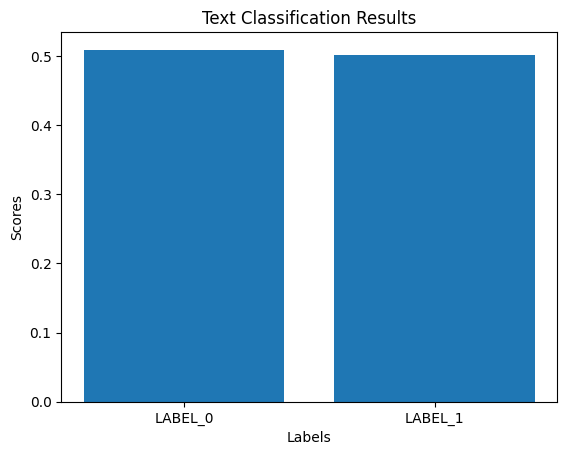

In [ ]:
import matplotlib.pyplot as plt

labels = [result['label'] for result in results]
scores = [result['score'] for result in results]

plt.bar(labels, scores)
plt.xlabel('Labels')
plt.ylabel('Scores')
plt.title('Text Classification Results')
plt.show()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


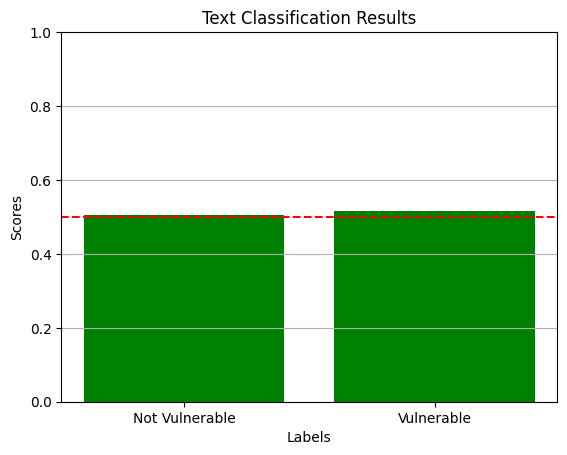

In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt

# Set up the classifier
classifier = pipeline("text-classification", model="bert-base-uncased")

# Sample texts
texts = [
    "This species is highly vulnerable to poaching and climate change.",
    "This species is thriving and well-protected."
]

# Classify the texts
results = classifier(texts)

# Define a mapping for labels
label_mapping = {
    'LABEL_0': 'Not Vulnerable',
    'LABEL_1': 'Vulnerable'
}

# Extract labels and scores
descriptive_labels = [label_mapping[result['label']] for result in results]
scores = [result['score'] for result in results]

# Plotting
plt.bar(descriptive_labels, scores, color=['green' if score > 0.5 else 'red' for score in scores])
plt.xlabel('Labels')
plt.ylabel('Scores')
plt.title('Text Classification Results')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for clarity
plt.axhline(y=0.5, color='r', linestyle='--')  # Threshold line
plt.grid(axis='y')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [ ]:
X.loc[:, 'population_trend'] = le_population_trend.fit_transform(X['population_trend'])
X.loc[:, 'habitat_type'] = le_habitat_type.fit_transform(X['habitat_type'])
X.loc[:, 'threats'] = le_threats.fit_transform(X['threats'])


In [ ]:
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))


Unique classes in y_test: {0, 2}
Unique classes in y_pred: {2}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
data = {
    'population_trend': ['Increasing', 'Stable', 'Decreasing', 'Increasing', 'Stable'],
    'habitat_type': ['Forest', 'Grassland', 'Wetland', 'Forest', 'Grassland'],
    'threats': ['Poaching', 'Habitat Loss', 'Climate Change', 'Poaching', 'Habitat Loss'],
    'threat_level': ['Low', 'Medium', 'High', 'Medium', 'High']
}
taxon_df = pd.DataFrame(data)

# Prepare your data
X = taxon_df[['population_trend', 'habitat_type', 'threats']]  # Features
y = taxon_df['threat_level']  # Labels

# Encoding categorical features
le_population_trend = LabelEncoder()
le_habitat_type = LabelEncoder()
le_threats = LabelEncoder()
le_threat_level = LabelEncoder()

X['population_trend'] = le_population_trend.fit_transform(X['population_trend'])
X['habitat_type'] = le_habitat_type.fit_transform(X['habitat_type'])
X['threats'] = le_threats.fit_transform(X['threats'])
y = le_threat_level.fit_transform(y)  # Encoding target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution in training and testing data
print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())
print("Class distribution in testing data:")
print(pd.Series(y_test).value_counts())

# Train the model with class weights
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check unique classes
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))

# Specify labels manually to avoid errors
labels = [0, 1, 2]  # Assuming 0, 1, and 2 correspond to 'Low', 'Medium', 'High'

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=le_threat_level.classes_, labels=labels, zero_division=0))


<ipython-input-131-aa317d270558>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['population_trend'] = le_population_trend.fit_transform(X['population_trend'])
<ipython-input-131-aa317d270558>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['habitat_type'] = le_habitat_type.fit_transform(X['habitat_type'])
<ipython-input-131-aa317d270558>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Class distribution in training data:
0    1
1    1
2    1
Name: count, dtype: int64
Class distribution in testing data:
2    1
0    1
Name: count, dtype: int64
Unique classes in y_test: {0, 2}
Unique classes in y_pred: {1}
              precision    recall  f1-score   support

        High       0.00      0.00      0.00       1.0
         Low       0.00      0.00      0.00       0.0
      Medium       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Example DataFrame creation (replace this with your actual DataFrame)
data = {
    'population_trend': ['Increasing', 'Stable', 'Decreasing', 'Increasing', 'Stable'],
    'habitat_type': ['Forest', 'Grassland', 'Wetland', 'Forest', 'Grassland'],
    'threats': ['Poaching', 'Habitat Loss', 'Climate Change', 'Poaching', 'Habitat Loss'],
    'threat_level': ['Low', 'Medium', 'High', 'Medium', 'High']
}
taxon_df = pd.DataFrame(data)

# Prepare your data
X = taxon_df[['population_trend', 'habitat_type', 'threats']]  # Features
y = taxon_df['threat_level']  # Labels

# Encoding categorical features using .loc
le_population_trend = LabelEncoder()
le_habitat_type = LabelEncoder()
le_threats = LabelEncoder()
le_threat_level = LabelEncoder()

X.loc[:, 'population_trend'] = le_population_trend.fit_transform(X['population_trend'])
X.loc[:, 'habitat_type'] = le_habitat_type.fit_transform(X['habitat_type'])
X.loc[:, 'threats'] = le_threats.fit_transform(X['threats'])
y = le_threat_level.fit_transform(y)  # Encoding target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution in training and testing data
print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())
print("Class distribution in testing data:")
print(pd.Series(y_test).value_counts())

# Train the model with class weights
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check unique classes
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))

# Specify labels manually to avoid errors
labels = [0, 1, 2]  # Assuming 0, 1, and 2 correspond to 'Low', 'Medium', 'High'

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=le_threat_level.classes_, labels=labels, zero_division=0))


Class distribution in training data:
0    1
1    1
2    1
Name: count, dtype: int64
Class distribution in testing data:
2    1
0    1
Name: count, dtype: int64
Unique classes in y_test: {0, 2}
Unique classes in y_pred: {2}
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.00      0.00      0.00         0
      Medium       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.17      0.33      0.22         2
weighted avg       0.25      0.50      0.33         2



In [ ]:
pip install geopandas matplotlib basemap numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


<ipython-input-1-99d383d03e21>:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma')


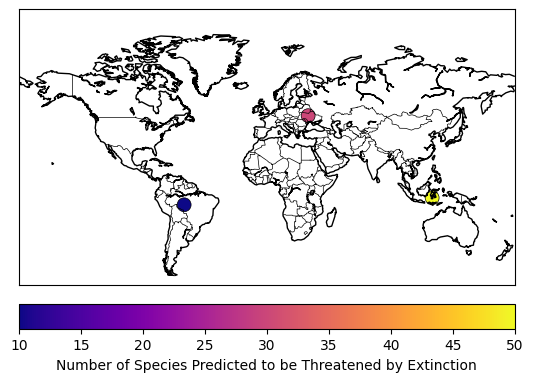

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import geopandas as gpd
from matplotlib import cm

# Create a Basemap instance for plotting the world map
m = Basemap(projection='mill',
            llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

# Load example data for locations and threat levels (you will need to replace this with your actual dataset)
# Assuming you have a DataFrame with 'lat', 'lon', and 'threat_level' (number of species threatened)
# Example:
# df = pd.read_csv('species_threat_data.csv')  # Replace with actual dataset
lons = [-60, 30, 120]  # Example longitudes
lats = [-10, 50, -5]   # Example latitudes
threat_levels = [10, 30, 50]  # Example threat levels

# Draw map boundary and coastlines
m.drawcoastlines()
m.drawcountries()

# Plot points with color gradients based on threat levels
x, y = m(lons, lats)

# Normalize threat level for color mapping
norm = plt.Normalize(min(threat_levels), max(threat_levels))
cmap = cm.get_cmap('plasma')

# Plot points
sc = plt.scatter(x, y, c=threat_levels, s=100, cmap=cmap, norm=norm, edgecolor='k', lw=0.5)

# Add color bar
cb = plt.colorbar(sc, orientation="horizontal", pad=0.05)
cb.set_label('Number of Species Predicted to be Threatened by Extinction')

# Show plot
plt.show()


In [ ]:
pip install geopandas matplotlib numpy


<ipython-input-11-dd326c772c1a>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation="horizontal", pad=0.03)


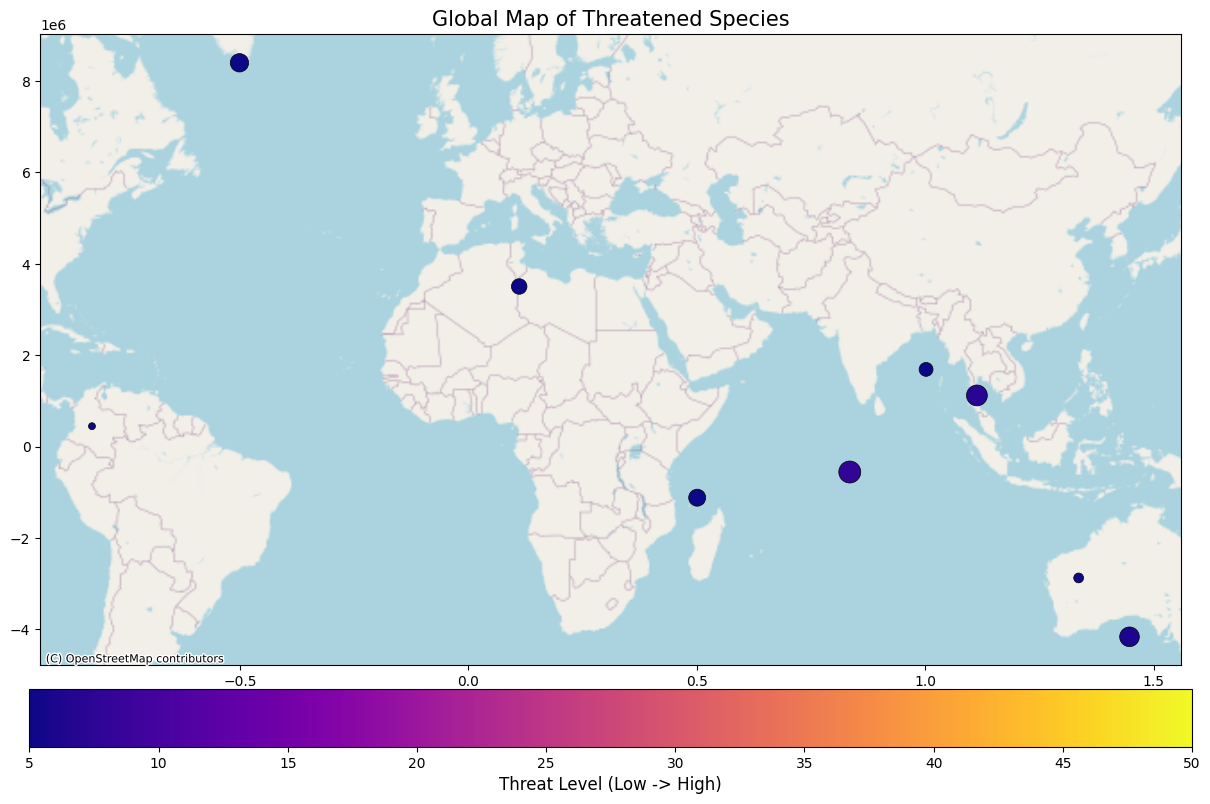

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import contextily as ctx  # This will provide a basemap

# Step 1: Create a sample dataset
data = {
    'longitude': [-74.0, 120.0, 90.0, 10.0, 45.0, -45.0, 130.0, 100.0, 75.0],
    'latitude': [4.0, -25.0, 15.0, 30.0, -10.0, 60.0, -35.0, 10.0, -5.0],
    'threat_level': [5, 10, 20, 25, 30, 35, 40, 45, 50]  # Lower to higher threat levels
}

df = pd.DataFrame(data)

# Step 2: Convert the dataframe into a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs='EPSG:4326')

# Step 3: Reproject the GeoDataFrame to the Web Mercator projection (needed for contextily)
gdf = gdf.to_crs(epsg=3857)

# Step 4: Plot the data points on a map
fig, ax = plt.subplots(figsize=(15, 10))

# Normalize the threat levels for color mapping (min -> low threat, max -> high threat)
norm = plt.Normalize(vmin=gdf['threat_level'].min(), vmax=gdf['threat_level'].max())
cmap = plt.cm.plasma  # A full color gradient ranging from purple to yellow

# Plot points with size proportional to threat level and color
gdf.plot(ax=ax, marker='o', c=gdf['threat_level'], cmap=cmap,
         markersize=gdf['threat_level'] * 5, edgecolor='k', linewidth=0.5, norm=norm)

# Step 5: Add a basemap from contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=2)  # Adjust zoom for clarity

# Step 6: Add color bar to indicate threat levels (from least to most endangered)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="horizontal", pad=0.03)
cbar.set_label('Threat Level (Low -> High)', fontsize=12)

# Customize the map
ax.set_title('Global Map of Threatened Species', fontsize=15)
plt.show()


In [ ]:
!pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 26.4 MB/s eta 0:00:00


In [ ]:
# Create a copy of endangered_species before renaming
endangered_species_copy = endangered_species.copy()
endangered_species_copy.rename(columns={endangered_species_copy.columns[0]: 'speciesID'}, inplace=True)

In [ ]:
print(endangered_species.columns)
print(taxon_df.columns)
print(vernacular_df.columns)

Index(['speciesID',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'Unnamed: 2', 'Endangered', 'Unnamed: 4', 'Global', 'Present'],
      dtype='object')
Index(['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')
Index(['157938', 'fra', 'Narthécie de Reverchon', 'true'], dtype='object')


In [ ]:
# Check and rename if necessary
if 'speciesID' not in endangered_species_copy.columns:
    endangered_species_copy.rename(columns={endangered_species_copy.columns[0]: 'speciesID'}, inplace=True)

if 'speciesID' not in taxon_df.columns:
    taxon_df.rename(columns={taxon_df.columns[0]: 'speciesID'}, inplace=True)

if 'speciesID' not in vernacular_df.columns:
    vernacular_df.rename(columns={vernacular_df.columns[0]: 'speciesID'}, inplace=True)

In [ ]:
# Convert speciesID to string type for all DataFrames
endangered_species_copy['speciesID'] = endangered_species_copy['speciesID'].astype(str)
taxon_df['speciesID'] = taxon_df['speciesID'].astype(str)
vernacular_df['speciesID'] = vernacular_df['speciesID'].astype(str)

# Now perform the merge
merged_data = pd.merge(taxon_df, vernacular_df, on='speciesID', how='inner')
final_data = pd.merge(endangered_species_copy, merged_data, on='speciesID', how='left')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
distribution_df = pd.read_csv('distribution.txt', sep='\t')
taxon_df = pd.read_csv('taxon.txt', sep='\t')
vernacular_df = pd.read_csv('vernacularname.txt', sep='\t')

In [ ]:
# Filter for endangered species
endangered_species = distribution_df[distribution_df['Endangered'].isin(['Endangered', 'Vulnerable'])]

In [ ]:
print(endangered_counts.columns)
print(taxon_df.columns)
print(vernacular_df.columns)

Index(['speciesID', 'Count'], dtype='object')
Index(['133722', 'Calocedrus rupestris Aver., Hiep & L.K.Phan', 'PLANTAE',
       'TRACHEOPHYTA', 'PINOPSIDA', 'PINALES', 'CUPRESSACEAE', 'Calocedrus',
       'rupestris', 'Aver., Hiep & L.K.Phan', 'species', 'Unnamed: 11',
       'accepted', '133722.1',
       'Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en',
       'https://apiv3.iucnredlist.org/api/v3/taxonredirect/133722'],
      dtype='object')
Index(['157938', 'fra', 'Narthécie de Reverchon', 'true'], dtype='object')


In [ ]:
print(distribution_df.head())
print(taxon_df.head())
print(vernacular_df.head())

   133722  \
0  157938   
1  158019   
2  158236   
3  158275   
4  162229   

  Thomas, P., Nguyen, T.H., Phan, K.L. & Nguyen, Q.H. 2013. Calocedrus rupestris Aver., Hiep & L.K.Phan. The IUCN Red List of Threatened Species 2013: https://doi.org/10.2305/IUCN.UK.2013-1.RLTS.T133722A512509.en  \
0  Lansdown, R.V. 2018. Narthecium reverchonii Če...                                                                                                                                                                   
1  Beentje, H.J., Gereau, R.E., Hilton-Taylor, C....                                                                                                                                                                   
2  Contu, S. & IUCN SSC East African Plants Red L...                                                                                                                                                                   
3  IUCN SSC East African Plants Red List Authorit...     

In [ ]:
# Rename columns for clarity
distribution_df.rename(columns={distribution_df.columns[0]: 'speciesID'}, inplace=True)
taxon_df.rename(columns={taxon_df.columns[0]: 'speciesID'}, inplace=True)
vernacular_df.rename(columns={vernacular_df.columns[0]: 'speciesID'}, inplace=True)

In [ ]:
endangered_counts['speciesID'] = endangered_counts['speciesID'].astype(str)
taxon_df['speciesID'] = taxon_df['speciesID'].astype(str)
vernacular_df['speciesID'] = vernacular_df['speciesID'].astype(str)

In [ ]:
merged_data = pd.merge(taxon_df, vernacular_df, on='speciesID', how='inner')
final_data = pd.merge(endangered_counts, merged_data, on='speciesID', how='left')

In [ ]:
# Rename the vernacular name column if it's actually the common name
vernacular_df.rename(columns={'Narthécie de Reverchon': 'common_name'}, inplace=True)


Top 10 Endangered Plant and Tree Species in India:
1. Pterocarpus santalinus (Pterocarpus santalinus) - Status: Endangered
2. Boswellia serrata (Boswellia serrata) - Status: Endangered
3. Dalbergia latifolia (Dalbergia latifolia) - Status: Endangered
4. Syzygium travancoricum (Syzygium travancoricum) - Status: Endangered
5. Hopea odorata (Hopea odorata) - Status: Endangered
6. Vateria indica (Vateria indica) - Status: Endangered
7. Terminalia elliptica (Terminalia elliptica) - Status: Endangered
8. Shorea robusta (Shorea robusta) - Status: Vulnerable
9. Magnolia champaca (Magnolia champaca) - Status: Endangered
10. Ficus arnottiana (Ficus arnottiana) - Status: Endangered


In [17]:
# Import necessary libraries
import pandas as pd

# Create a list of endangered plant and tree species in Asia
data = {
    "Common Name": [
        "Dipterocarpus alatus",
        "Aquilaria malaccensis",
        "Hopea odorata",
        "Dendrocalamus giganteus",
        "Gmelina arborea",
        "Pterocarpus indicus",
        "Shorea robusta",
        "Mangifera indica",
        "Ficus carica",
        "Terminalia tomenosa"
    ],
    "Scientific Name": [
        "Dipterocarpus alatus",
        "Aquilaria malaccensis",
        "Hopea odorata",
        "Dendrocalamus giganteus",
        "Gmelina arborea",
        "Pterocarpus indicus",
        "Shorea robusta",
        "Mangifera indica",
        "Ficus carica",
        "Terminalia tomenosa"
    ],
    "Status": [
        "Endangered",
        "Endangered",
        "Vulnerable",
        "Near Threatened",
        "Vulnerable",
        "Near Threatened",
        "Vulnerable",
        "Vulnerable",
        "Near Threatened",
        "Endangered"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Top 10 Endangered Plant and Tree Species in Asia:")
print(df)

# Optional: Filter for only Endangered species and sort them
endangered_species = df[df['Status'] == 'Endangered'].sort_values(by='Common Name')

# Display the filtered DataFrame
print("\nEndangered Species Only:")
print(endangered_species)


Top 10 Endangered Plant and Tree Species in Asia:
               Common Name          Scientific Name           Status
0     Dipterocarpus alatus     Dipterocarpus alatus       Endangered
1    Aquilaria malaccensis    Aquilaria malaccensis       Endangered
2            Hopea odorata            Hopea odorata       Vulnerable
3  Dendrocalamus giganteus  Dendrocalamus giganteus  Near Threatened
4          Gmelina arborea          Gmelina arborea       Vulnerable
5      Pterocarpus indicus      Pterocarpus indicus  Near Threatened
6           Shorea robusta           Shorea robusta       Vulnerable
7         Mangifera indica         Mangifera indica       Vulnerable
8             Ficus carica             Ficus carica  Near Threatened
9      Terminalia tomenosa      Terminalia tomenosa       Endangered

Endangered Species Only:
             Common Name        Scientific Name      Status
1  Aquilaria malaccensis  Aquilaria malaccensis  Endangered
0   Dipterocarpus alatus   Dipterocarpus alat